### Prediksi Harga Rumah di Kabupaten Tangerang
#### Daffa Kaisha Pratama Chandra - 55770
---
##### Import library yang dibutuhkan

In [1]:
# Library dasar
import pandas as pd
import numpy as np
from scipy import stats

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV

# Machine Learning
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Regresi linear
from sklearn.ensemble import RandomForestRegressor # Random forest regressor
from xgboost import XGBRegressor # XGBoost

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ignore warning
import warnings
warnings.simplefilter('ignore')

---
#### Baca data harga rumah di tangerang
Deskripsi singkat mengenai dataset: <br>
Dataset ini diambil dengan cara <i> web scraping </i> pada situs realoka.com. <br>
Dataset ini masih berupa data mentah sehingga harus di proses terlebih dahulu.<br>
Dataset ini berisi data harga rumah dan spesifikasi rumah di wilayah Kabupaten Tangerang.

In [2]:
# Baca data
rumah = pd.read_csv("rumah_kab_tangerang.csv", engine='pyarrow')
rumah.head()

,nama_rumah,alamat,harga,deskripsi,Tayang Sejak,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Sertifikat,...,Kelengkapan1,Jumlah Lantai1,Menghadap1,Parkir1,Kolam Renang1,AC1,One Gate1,Pengamanan1,Wilayah,url
0,Rumahku Matagara Tangerang dekat Pusat Pemerin...,"Jalan Raya Puspem Tigaraksa, Tangerang Kab",320.400.000,Deskripsi dan SpesifikasiCLUSTER RUMAHKU MATAG...,9 jam yang lalu,30 m2,60 m2,2,1,HGB - Hak Guna Bangunan,...,Kosongan,1.0,Timur,1 mobil,1.0,1.0,1.0,1.0,Kabupaten Tangerang,https://www.realoka.com/417850-rumahku-matagar...
1,"Cluster Terbaru Puri, Cluster Maleo, Banyak Pr...","Puri Jaya Pasar Kemis, Tangerang Kab",500.000.000,Deskripsi dan SpesifikasiPuri Jaya Pasar Kemis...,15 jam yang lalu,60 m2,46 m2,2,2,SHM - Sertifikat Hak Milik,...,None,NaN,None,None,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/412981-cluster-terbaru...
2,"Cluster Maleo Puri Jaya Pasar Kemis, DP Bisa 0","Puri Jaya Pasar Kemis, Tangerang Kab",500.000.000,Deskripsi dan SpesifikasiHunian cluster Maleo ...,16 jam yang lalu,60 m2,46 m2,2,2,SHM - Sertifikat Hak Milik,...,None,NaN,None,None,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/417746-cluster-maleo-p...
3,"New Cluster Puri Jaya, Cluster Maleo, dekat Ko...","Puri Jaya Pasar Kemis Nur Sodik, Tangerang Kab",440.000.000,Deskripsi dan SpesifikasiPuri Jaya adalah PERU...,6 hari yang lalu,60 m2,31 m2,2,1,SHM - Sertifikat Hak Milik,...,None,NaN,None,None,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/408932-new-cluster-pur...
4,Cluster Tanamera Residence dekat Bandara Soett...,"Jalan Gatot Subroto Tanah Merah Sepatan, Tang...",297.000.000,Deskripsi dan SpesifikasiCLUSTER TANAMERA RESI...,1 minggu yang lalu,60 m2,30 m2,2,1,SHM - Sertifikat Hak Milik,...,None,NaN,None,None,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/410318-cluster-tanamer...


In [3]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_rumah      2310 non-null   object 
 1   alamat          2310 non-null   object 
 2   harga           2310 non-null   object 
 3   deskripsi       2310 non-null   object 
 4   Tayang Sejak    2310 non-null   object 
 5   Luas Tanah      2310 non-null   object 
 6   Luas Bangunan   2310 non-null   object 
 7   Kamar Tidur     2310 non-null   int64  
 8   Kamar Mandi     2310 non-null   int64  
 9   Sertifikat      2310 non-null   object 
 10  Kondisi         2310 non-null   object 
 11  Kelengkapan     2310 non-null   object 
 12  Jumlah Lantai   2310 non-null   object 
 13  Menghadap       2310 non-null   object 
 14  Daya Listrik    1666 non-null   object 
 15  Parkir          2310 non-null   object 
 16  AC              533 non-null    float64
 17  Kitchen Set     399 non-null    f

Karena dataset yang diimport masih berupa data mentah, maka akan dilakukan data cleaning terlebih dahulu. Proses data cleaning disini mencakup membuang kolom yang terduplikat dan mengganti nilai NaN pada dataset dengan 0.

In [4]:
# Drop kolom yang tidak duplikat. Kolom pada index 27 - 43
rumah = rumah.iloc[:, list(range(0, 27)) + list(range(42, 44))]
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_rumah     2310 non-null   object 
 1   alamat         2310 non-null   object 
 2   harga          2310 non-null   object 
 3   deskripsi      2310 non-null   object 
 4   Tayang Sejak   2310 non-null   object 
 5   Luas Tanah     2310 non-null   object 
 6   Luas Bangunan  2310 non-null   object 
 7   Kamar Tidur    2310 non-null   int64  
 8   Kamar Mandi    2310 non-null   int64  
 9   Sertifikat     2310 non-null   object 
 10  Kondisi        2310 non-null   object 
 11  Kelengkapan    2310 non-null   object 
 12  Jumlah Lantai  2310 non-null   object 
 13  Menghadap      2310 non-null   object 
 14  Daya Listrik   1666 non-null   object 
 15  Parkir         2310 non-null   object 
 16  AC             533 non-null    float64
 17  Kitchen Set    399 non-null    float64
 18  Alat Dap

Kolom yang terduplikat berhasil dihapus

In [5]:
# Mengganti nilai NaN dengan 0.
# Cek kolom yang terdapat missing values terlebih dahulu
rumah.isnull().sum()

nama_rumah          0
alamat              0
harga               0
deskripsi           0
Tayang Sejak        0
Luas Tanah          0
Luas Bangunan       0
Kamar Tidur         0
Kamar Mandi         0
Sertifikat          0
Kondisi             0
Kelengkapan         0
Jumlah Lantai       0
Menghadap           0
Daya Listrik      644
Parkir              0
AC               1777
Kitchen Set      1911
Alat Dapur       2151
Water Heater     2130
Air Sumur Bor    1609
Balkon           1898
One Gate         1079
Pengamanan        908
Air PAM          1592
Kolam Renang     1857
K. Pembantu      2063
Wilayah             0
url                 0
dtype: int64

In [6]:
# List kolom dengan missing values
cols_missing = ['Daya Listrik', 'Kolam Renang', 'Air PAM', 'One Gate', 'Pengamanan', 'AC', 'K. Pembantu', 
                'Alat Dapur', 'Air Sumur Bor', 'Balkon', 'Water Heater', 'Kitchen Set']

# Cek nilai uniknya
for i in cols_missing:
    print(f'Nilai unik pada kolom {i}: {rumah[i].unique()}')

Nilai unik pada kolom Daya Listrik: ['1300 VA' '2200 VA' '22000 VA' '13000 VA' '900 VA' '3500 VA' None
 '3300 VA' '5500 VA' '4400 VA' '5200 VA' '7700 VA' '10000 VA' '220 VA'
 '3600 VA' '2600 VA' '14000 VA' '35000 VA' '1200 VA' '16500 VA' '16000 VA'
 '6600 VA' '5000 VA' '3000 VA' '4000 VA' '440 VA' '11000 VA' '2300 VA'
 '10600 VA' '8700 VA' '9000 VA' '1400 VA' '23000 VA' '1300000 VA'
 '2000 VA' '130 VA' '1350 VA' '2500 VA' '990 VA' '1500 VA' '3800 VA'
 '130000 VA' '1000 VA' '950 VA']
Nilai unik pada kolom Kolam Renang: [nan  1.]
Nilai unik pada kolom Air PAM: [nan  1.]
Nilai unik pada kolom One Gate: [ 1. nan]
Nilai unik pada kolom Pengamanan: [ 1. nan]
Nilai unik pada kolom AC: [ 1. nan]
Nilai unik pada kolom K. Pembantu: [nan  1.]
Nilai unik pada kolom Alat Dapur: [ 1. nan]
Nilai unik pada kolom Air Sumur Bor: [ 1. nan]
Nilai unik pada kolom Balkon: [ 1. nan]
Nilai unik pada kolom Water Heater: [ 1. nan]
Nilai unik pada kolom Kitchen Set: [ 1. nan]


In [7]:
# Ubah nilai None pada kolom Daya Listrik menjadi Lainnya
rumah['Daya Listrik'] = rumah['Daya Listrik'].fillna(rumah['Daya Listrik'].mode()[0])
rumah['Daya Listrik'].unique()

array(['1300 VA', '2200 VA', '22000 VA', '13000 VA', '900 VA', '3500 VA',
       '3300 VA', '5500 VA', '4400 VA', '5200 VA', '7700 VA', '10000 VA',
       '220 VA', '3600 VA', '2600 VA', '14000 VA', '35000 VA', '1200 VA',
       '16500 VA', '16000 VA', '6600 VA', '5000 VA', '3000 VA', '4000 VA',
       '440 VA', '11000 VA', '2300 VA', '10600 VA', '8700 VA', '9000 VA',
       '1400 VA', '23000 VA', '1300000 VA', '2000 VA', '130 VA',
       '1350 VA', '2500 VA', '990 VA', '1500 VA', '3800 VA', '130000 VA',
       '1000 VA', '950 VA'], dtype=object)

In [8]:
# Ubah nilai spesifikasi Nan menjadi 0
spec_cols_missing = ['Kolam Renang', 'Air PAM', 'One Gate', 'Pengamanan', 'AC', 'K. Pembantu', 
                'Alat Dapur', 'Air Sumur Bor', 'Balkon', 'Water Heater', 'Kitchen Set']

for index in spec_cols_missing:
    rumah[index] = rumah[index].fillna(0)

# Cek missing values lagi
rumah.isnull().sum()

nama_rumah       0
alamat           0
harga            0
deskripsi        0
Tayang Sejak     0
Luas Tanah       0
Luas Bangunan    0
Kamar Tidur      0
Kamar Mandi      0
Sertifikat       0
Kondisi          0
Kelengkapan      0
Jumlah Lantai    0
Menghadap        0
Daya Listrik     0
Parkir           0
AC               0
Kitchen Set      0
Alat Dapur       0
Water Heater     0
Air Sumur Bor    0
Balkon           0
One Gate         0
Pengamanan       0
Air PAM          0
Kolam Renang     0
K. Pembantu      0
Wilayah          0
url              0
dtype: int64

In [9]:
# Cek informasi dari data rumah yang siap pakai
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_rumah     2310 non-null   object 
 1   alamat         2310 non-null   object 
 2   harga          2310 non-null   object 
 3   deskripsi      2310 non-null   object 
 4   Tayang Sejak   2310 non-null   object 
 5   Luas Tanah     2310 non-null   object 
 6   Luas Bangunan  2310 non-null   object 
 7   Kamar Tidur    2310 non-null   int64  
 8   Kamar Mandi    2310 non-null   int64  
 9   Sertifikat     2310 non-null   object 
 10  Kondisi        2310 non-null   object 
 11  Kelengkapan    2310 non-null   object 
 12  Jumlah Lantai  2310 non-null   object 
 13  Menghadap      2310 non-null   object 
 14  Daya Listrik   2310 non-null   object 
 15  Parkir         2310 non-null   object 
 16  AC             2310 non-null   float64
 17  Kitchen Set    2310 non-null   float64
 18  Alat Dap

In [10]:
print(f"Dataset rumah terdiri atas {rumah.shape[1]} kolom dan {rumah.shape[0]} baris.")

Dataset rumah terdiri atas 29 kolom dan 2310 baris.


In [11]:
# Ubah kolom harga, Luas Tanah, Luas Bangunan kedalam tipe data numerik (integer)
rumah['harga'] = pd.to_numeric(rumah['harga'].str.replace('.', ''))
rumah['Luas Bangunan'] = pd.to_numeric(rumah['Luas Bangunan'].str.replace(' m2', ''))
rumah['Luas Tanah'] = pd.to_numeric(rumah['Luas Tanah'].str.replace(' m2', ''))
rumah['Parkir'] = rumah['Parkir'].str.replace('-', 'Lainnya')
rumah['Menghadap'] = rumah['Menghadap'].str.replace('-', 'Lainnya')
rumah['Daya Listrik'] = rumah['Daya Listrik'].str.replace(' VA', '').astype('int')

---
#### Exploratory Data Analysis
Tahap ini dilakukan untuk mencari <i> insights </i> tersembunyi yang ada pada data rumah. <br> <br>
Deskripsi Statistik Sederhana

In [12]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_rumah     2310 non-null   object 
 1   alamat         2310 non-null   object 
 2   harga          2310 non-null   int64  
 3   deskripsi      2310 non-null   object 
 4   Tayang Sejak   2310 non-null   object 
 5   Luas Tanah     2310 non-null   int64  
 6   Luas Bangunan  2310 non-null   int64  
 7   Kamar Tidur    2310 non-null   int64  
 8   Kamar Mandi    2310 non-null   int64  
 9   Sertifikat     2310 non-null   object 
 10  Kondisi        2310 non-null   object 
 11  Kelengkapan    2310 non-null   object 
 12  Jumlah Lantai  2310 non-null   object 
 13  Menghadap      2310 non-null   object 
 14  Daya Listrik   2310 non-null   int32  
 15  Parkir         2310 non-null   object 
 16  AC             2310 non-null   float64
 17  Kitchen Set    2310 non-null   float64
 18  Alat Dap

In [13]:
# Describe rumah
print(rumah.describe(include='all'))

                                  nama_rumah  \
count                                   2310   
unique                                  2249   
top     Dijual Rumah Pribadi Cepat Tangerang   
freq                                       7   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                       alamat         harga  \
count                                    2310  2.310000e+03   
unique                                   1709           NaN   
top      Rajeg Kukun Tangerang, Tangerang Kab           NaN   
freq                                       32           NaN   
mean                                      NaN  1.434722e+09   
std                                       NaN

In [14]:
# Remove data anomali pada kolom luas tanah, luas bangunan, daya listrik
rumah = rumah[(rumah['Luas Tanah'] > 10) & (rumah['Luas Tanah'] <= 200) & (rumah['Luas Bangunan'] > 10) &(rumah['Luas Bangunan'] <= 200)]
rumah = rumah[(rumah['Daya Listrik'] < 8000)]

In [15]:
# Replace kolom wilayah dengan nama kecamatan di Kabupaten tangerang sesuai dengan alamat
kecamatan = ['Balaraja', 'Cikupa', 'Cisauk', 'Cisoka', 'Curug', 'Gunung Kaler',
             'Jambe', 'Jayanti', 'Kelapa Dua', 'Kemiri', 'Kresek', 'Kronjo',
             'Kosambi', 'Legok', 'Mauk', 'Mekarbaru', 'Pagedangan', 'Pakuhaji',
             'Panongan', 'Pasar Kemis', 'Rajeg', 'Sepatan', 'Sepatan Timur', 'Sindang Jaya',
             'Solear', 'Sukadiri', 'Sukamulya', 'Teluknaga', 'Tigaraksa']

In [16]:
# Function to extract kecamatan name
def get_kecamatan_name(address):
    for kec in kecamatan:
        if kec in address:
            return kec
    return None

# Create a new column "nama_kecamatan" based on the "address" column
rumah['nama_kecamatan'] = rumah['alamat'].apply(get_kecamatan_name)

# Print the updated DataFrame
rumah.shape

(2062, 30)

In [17]:
rumah.dropna(inplace=True)
print(rumah.shape)

(1265, 30)


Handling Outliers

Text(0.5, 1.0, 'Outliers pada kolom Harga')

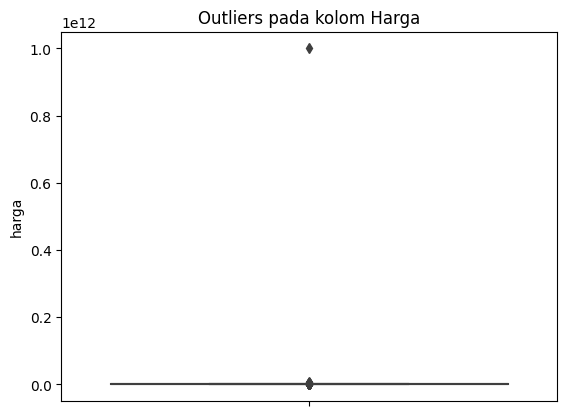

In [18]:
# Cek outliers pada kolom harga
sns.boxplot(y='harga', data=rumah)
plt.title("Outliers pada kolom Harga")

In [19]:
# Assuming 'rumah' is your DataFrame with a 'harga' column

# Set the number of times to run the outlier removal process
num_iterations = 1

# Set the threshold to identify outliers
threshold = 2.0

for _ in range(num_iterations):
    # Calculate z-scores
    z_scores = stats.zscore(rumah['harga'])

    outlier_indices = []
    for i, z in enumerate(z_scores):
        if z > threshold:
            outlier_indices.append(i)

    # Remove outliers from the DataFrame
    rumah = rumah.drop(outlier_indices)

    # Reset the DataFrame index
    rumah.reset_index(drop=True, inplace=True)

# The 'rumah' DataFrame now has outliers removed 4 times

KeyError: '[1242] not found in axis'

Text(0.5, 1.0, 'Outliers pada kolom Harga')

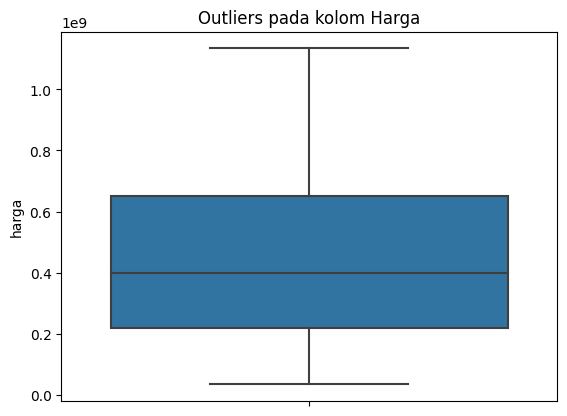

In [ ]:
# Cek outliers pada kolom harga
#numeric_columns = rumah.select_dtypes(include=['number'])
sns.boxplot(y='harga', data=rumah)
plt.title("Outliers pada kolom Harga")

In [ ]:
print(f"Setelah handling outliers, dataset rumah terdiri atas {rumah.shape[1]} kolom dan {rumah.shape[0]} baris.")

Setelah handling outliers, dataset rumah terdiri atas 29 kolom dan 1742 baris.


Persebaran Harga Rumah

Text(0.5, 1.0, 'Distribusi Harga Rumah di Kabupaten Tangerang')

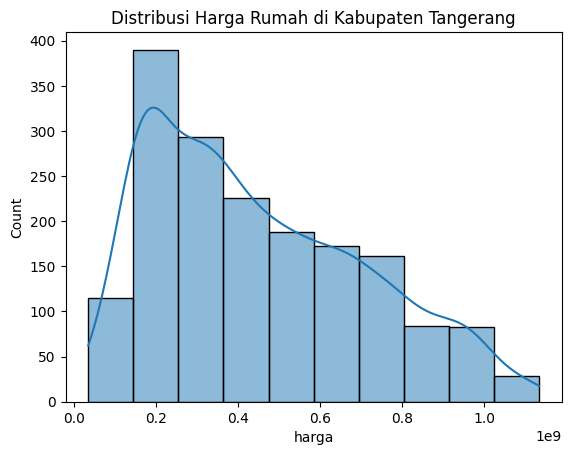

In [ ]:
sns.histplot(x='harga', data=rumah, kde=True, bins=10)
plt.title("Distribusi Harga Rumah di Kabupaten Tangerang")

In [ ]:
print(f'Skewness dari data harga: {stats.skew(rumah.harga)}')

Skewness dari data harga: 0.5832421834625404


Skewness dari variabel Harga bernilai positif, artinya persebaran data harga rumah bukan merupakan distribusi normal. <br> <br>

Binning

In [ ]:
# Define custom bin edges based on max, min, and median
bin_edges = [18, 80, 150, 200]  # You can adjust these bin edges based on your criteria
bin_labels = ['Kecil', 'Sedang', 'Besar']

# Use cut to assign data points to bins
bins = pd.cut(rumah['Luas Tanah'], bins=bin_edges, labels=bin_labels)


# Print the resulting DataFrame
rumah['Kategori Luas Tanah'] = bins
rumah['Kategori Luas Tanah'] = rumah['Kategori Luas Tanah'].astype('object')

rumah = rumah.dropna(subset=['Kategori Luas Tanah'])

In [ ]:
# Define custom bin edges based on max, min, and median
bin_edges = [20, 80, 130, 200]  # You can adjust these bin edges based on your criteria
bin_labels = ['Kecil', 'Sedang', 'Besar']

# Use cut to assign data points to bins
bins = pd.cut(rumah['Luas Bangunan'], bins=bin_edges, labels=bin_labels)


# Print the resulting DataFrame
rumah['Kategori Luas Bangunan'] = bins
rumah['Kategori Luas Bangunan'] = rumah['Kategori Luas Bangunan'].astype('object')

rumah = rumah.dropna(subset=['Kategori Luas Bangunan'])

<Axes: xlabel='Kategori Luas Tanah', ylabel='count'>

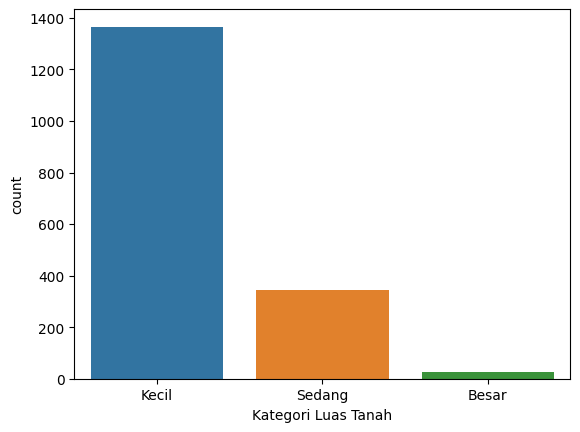

In [ ]:
sns.countplot(x='Kategori Luas Tanah', data=rumah)

<Axes: xlabel='Kategori Luas Bangunan', ylabel='count'>

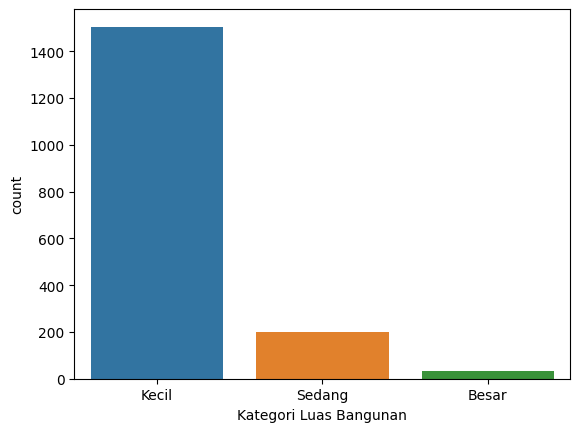

In [ ]:
sns.countplot(x='Kategori Luas Bangunan', data=rumah)

Visualisasi Persebaran Spesifikasi Rumah

In [ ]:
# Tampung spesifikasi rumah kedalam variabel spec_cols
spec1 = rumah.iloc[:, 7:14]
spec2 = rumah.iloc[:, 15:27]
spec_cols = spec1+spec2
spec_cols.columns

Index(['AC', 'Air PAM', 'Air Sumur Bor', 'Alat Dapur', 'Balkon',
       'Jumlah Lantai', 'K. Pembantu', 'Kamar Mandi', 'Kamar Tidur',
       'Kelengkapan', 'Kitchen Set', 'Kolam Renang', 'Kondisi', 'Menghadap',
       'One Gate', 'Parkir', 'Pengamanan', 'Sertifikat', 'Water Heater'],
      dtype='object')

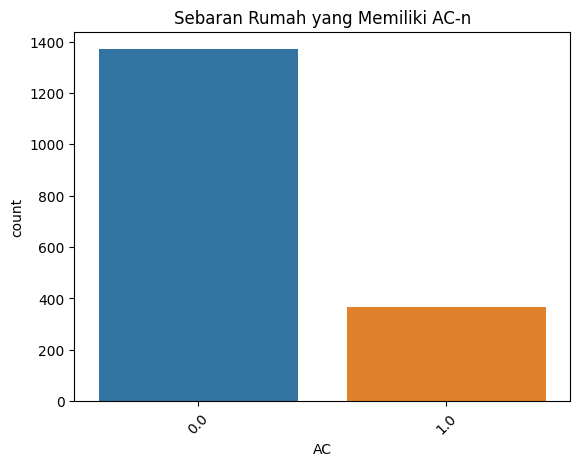

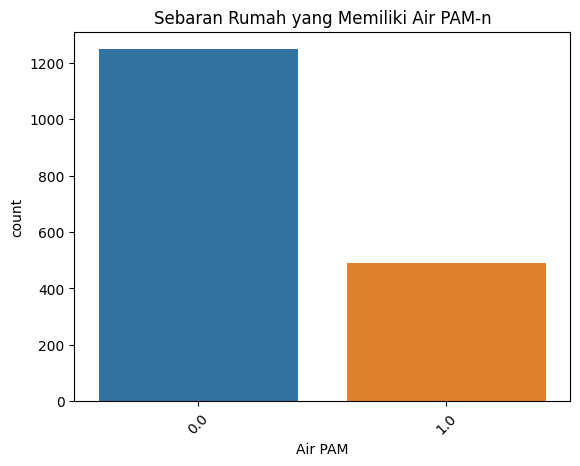

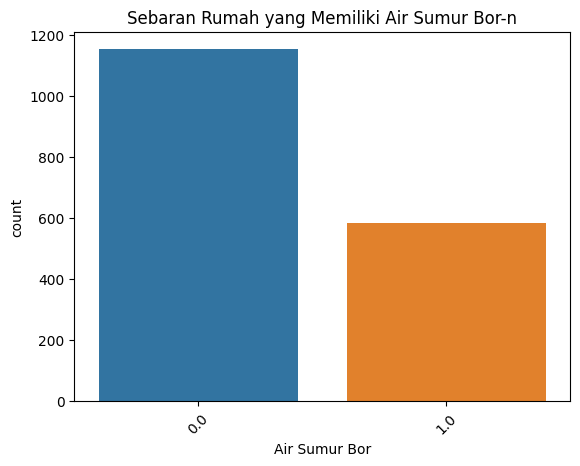

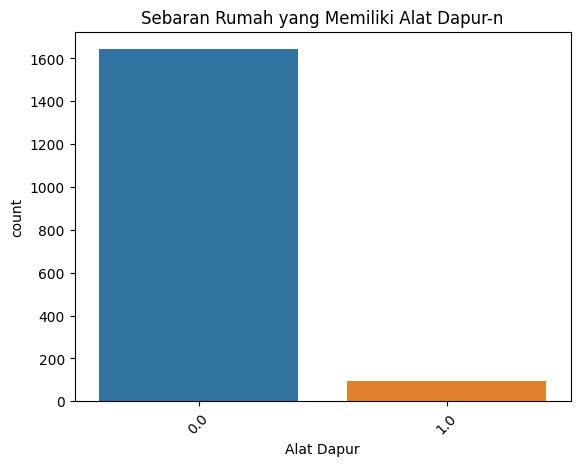

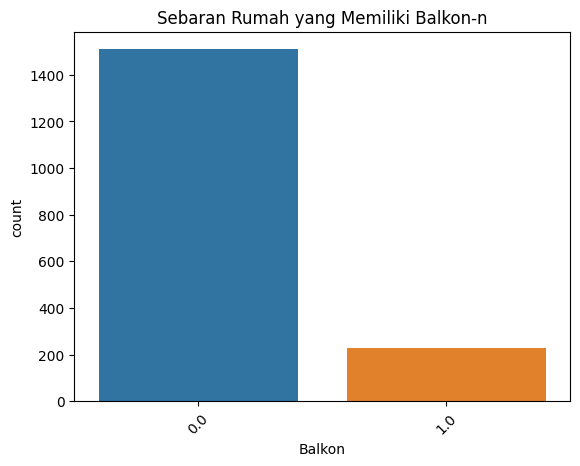

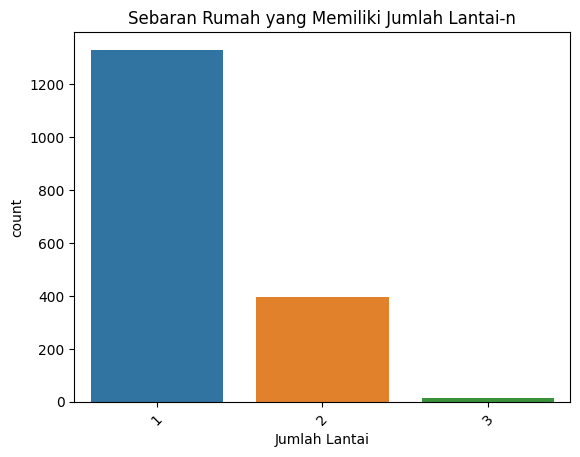

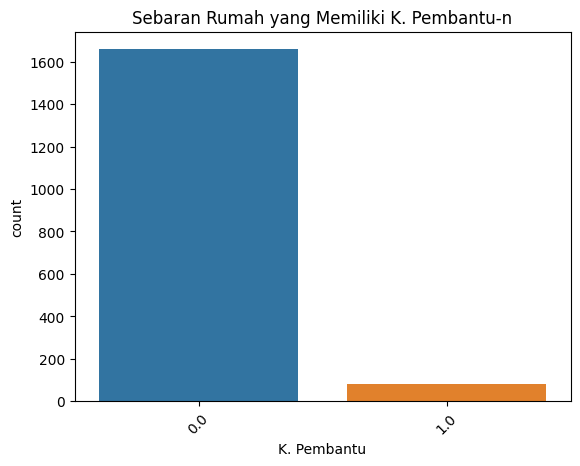

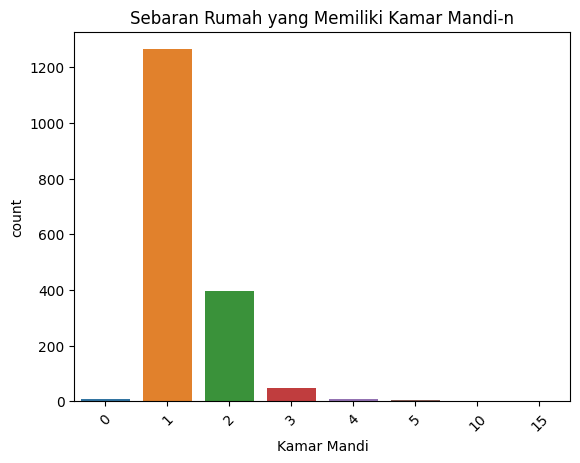

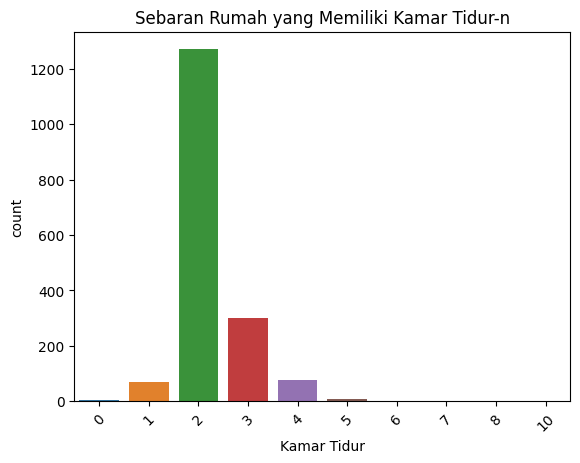

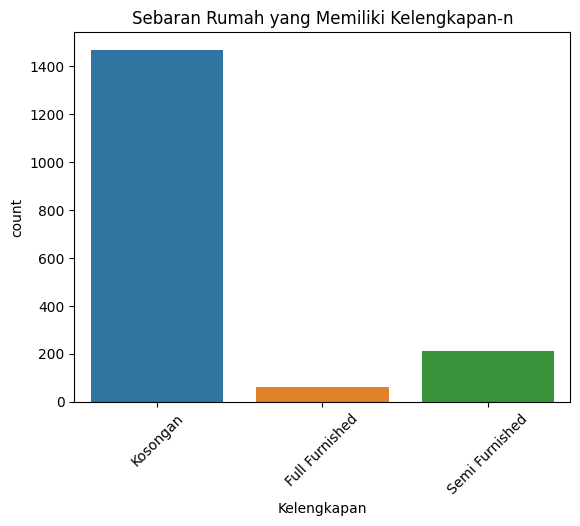

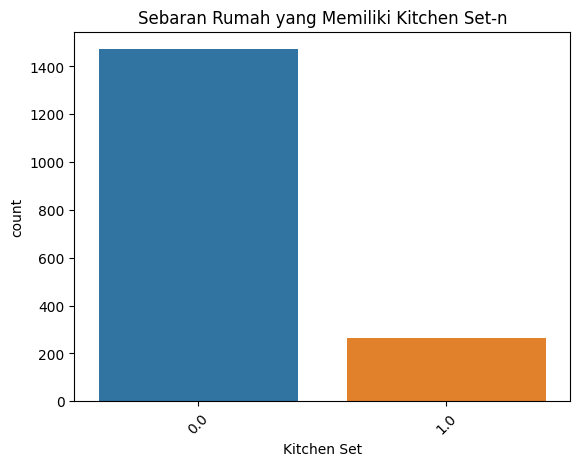

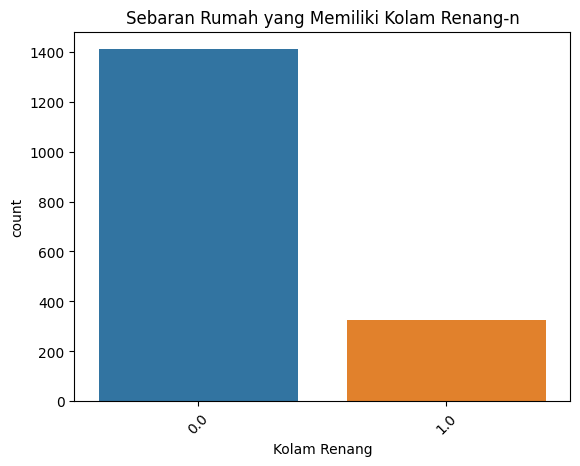

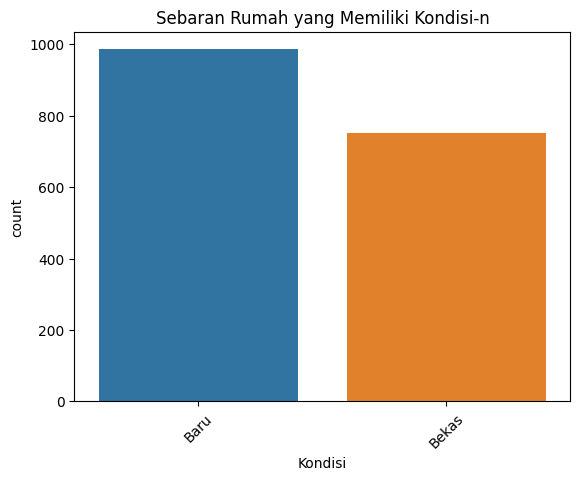

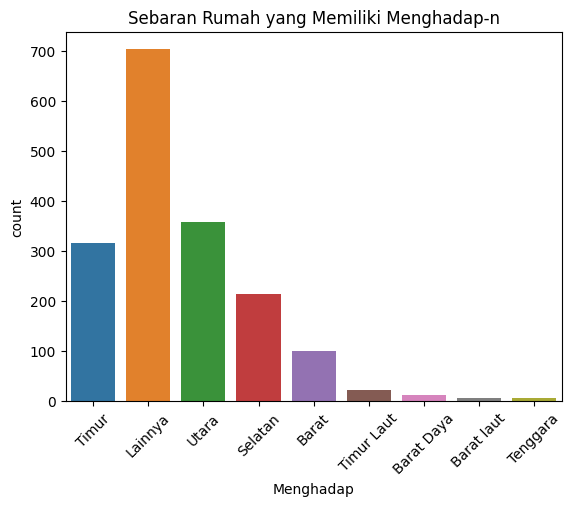

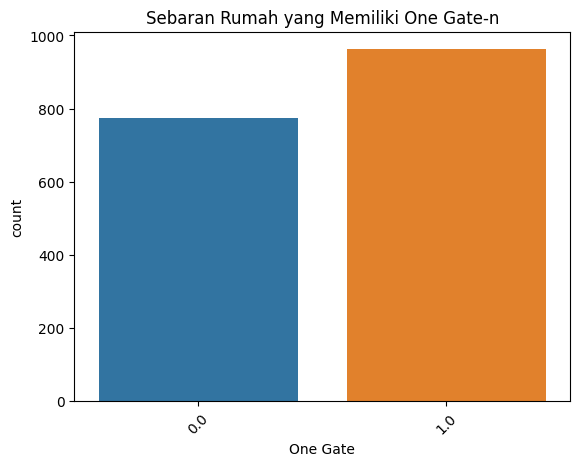

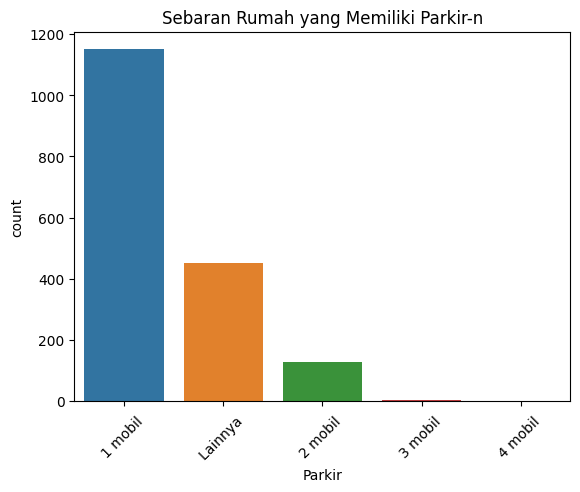

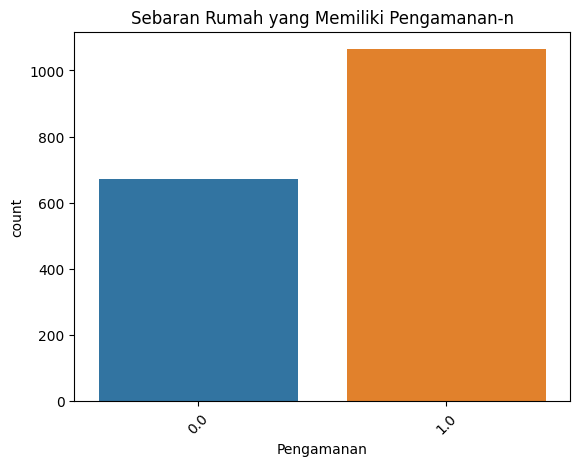

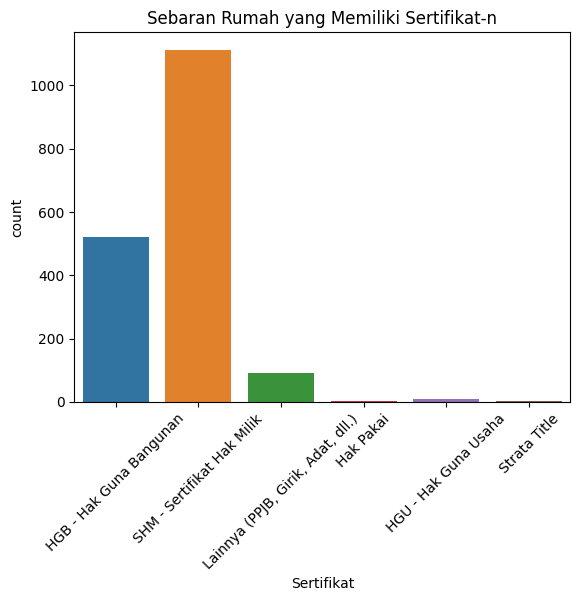

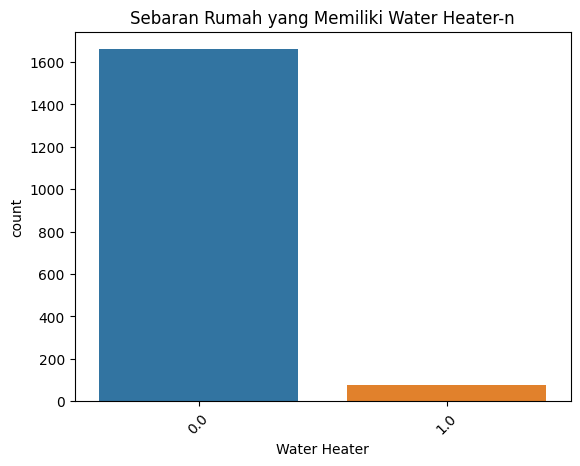

In [ ]:
for i in spec_cols:
    sns.countplot(x=i, data=rumah)
    plt.title(f'Sebaran Rumah yang Memiliki {i}-n')
    plt.xticks(rotation=45)
    plt.show()

<Axes: xlabel='Daya Listrik', ylabel='Count'>

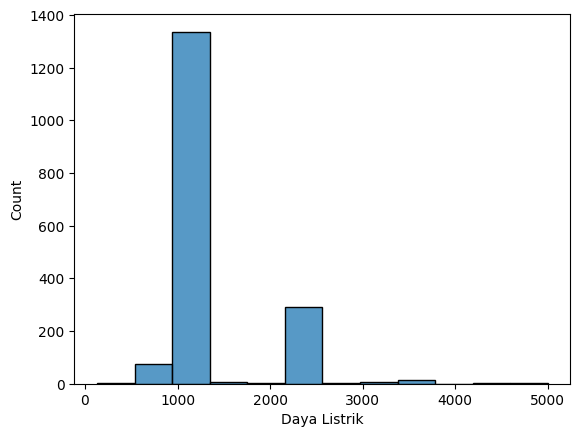

In [ ]:
sns.histplot(rumah['Daya Listrik'])

Mencari berapa lama rumah sudah di iklankan di situs realoka.com (dalam tahun)

In [ ]:
# Konvert isi kolom Tayang Sejak kedalam kolom Tahun_Listing
# Definisikan dict time_unit untuk menyimpan data waktu
from datetime import datetime, timedelta
a
time_units = {
    'tahun': timedelta(days=365),  # Assuming a year is 365 days
    'bulan': timedelta(days=30),   # Assuming a month is 30 days
    'minggu': timedelta(weeks=1),
    'hari': timedelta(days=1),
    'jam': timedelta(hours=1),
    'menit': timedelta(minutes=1)
}

NameError: name 'a' is not defined

In [ ]:
# Fungsi untuk mengubah kolom Tayang Sejak menjadi Tahun Listing
def convert_to_years(time_ago):
    parts = time_ago.split()
    if len(parts) == 4:
        amount = int(parts[0])
        unit = parts[1]
        if unit in time_units:
            total_time_difference = time_units[unit] * amount
            current_datetime = datetime.now()
            target_datetime = current_datetime - total_time_difference
            return target_datetime.year
    return None

rumah['Tahun_Listing'] = rumah['Tayang Sejak'].apply(convert_to_years)
rumah.head()

,nama_rumah,alamat,harga,deskripsi,Tayang Sejak,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Sertifikat,...,One Gate,Pengamanan,Air PAM,Kolam Renang,K. Pembantu,Wilayah,url,Kategori Luas Tanah,Kategori Luas Bangunan,Tahun_Listing
0,Rumahku Matagara Tangerang dekat Pusat Pemerin...,"Jalan Raya Puspem Tigaraksa, Tangerang Kab",320400000,Deskripsi dan SpesifikasiCLUSTER RUMAHKU MATAG...,9 jam yang lalu,30,60,2,1,HGB - Hak Guna Bangunan,...,1.0,1.0,0.0,0.0,0.0,Kabupaten Tangerang,https://www.realoka.com/417850-rumahku-matagar...,Kecil,Kecil,2023
1,"Cluster Terbaru Puri, Cluster Maleo, Banyak Pr...","Puri Jaya Pasar Kemis, Tangerang Kab",500000000,Deskripsi dan SpesifikasiPuri Jaya Pasar Kemis...,15 jam yang lalu,60,46,2,2,SHM - Sertifikat Hak Milik,...,1.0,1.0,1.0,0.0,0.0,Kabupaten Tangerang,https://www.realoka.com/412981-cluster-terbaru...,Kecil,Kecil,2023
2,"Cluster Maleo Puri Jaya Pasar Kemis, DP Bisa 0","Puri Jaya Pasar Kemis, Tangerang Kab",500000000,Deskripsi dan SpesifikasiHunian cluster Maleo ...,16 jam yang lalu,60,46,2,2,SHM - Sertifikat Hak Milik,...,1.0,1.0,1.0,1.0,0.0,Kabupaten Tangerang,https://www.realoka.com/417746-cluster-maleo-p...,Kecil,Kecil,2023
3,"New Cluster Puri Jaya, Cluster Maleo, dekat Ko...","Puri Jaya Pasar Kemis Nur Sodik, Tangerang Kab",440000000,Deskripsi dan SpesifikasiPuri Jaya adalah PERU...,6 hari yang lalu,60,31,2,1,SHM - Sertifikat Hak Milik,...,1.0,1.0,1.0,1.0,0.0,Kabupaten Tangerang,https://www.realoka.com/408932-new-cluster-pur...,Kecil,Kecil,2023
4,Cluster Tanamera Residence dekat Bandara Soett...,"Jalan Gatot Subroto Tanah Merah Sepatan, Tang...",297000000,Deskripsi dan SpesifikasiCLUSTER TANAMERA RESI...,1 minggu yang lalu,60,30,2,1,SHM - Sertifikat Hak Milik,...,1.0,1.0,1.0,0.0,1.0,Kabupaten Tangerang,https://www.realoka.com/410318-cluster-tanamer...,Kecil,Kecil,2023


In [ ]:
rumah['Tayang Sejak'].unique()

array(['9 jam yang lalu', '15 jam yang lalu', '16 jam yang lalu',
       '6 hari yang lalu', '1 minggu yang lalu', '7 jam yang lalu',
       '17 jam yang lalu', '19 jam yang lalu', '20 jam yang lalu',
       '1 hari yang lalu', '2 hari yang lalu', '3 hari yang lalu',
       '4 hari yang lalu', '5 hari yang lalu', '2 minggu yang lalu',
       '3 minggu yang lalu', '4 minggu yang lalu', '1 bulan yang lalu',
       '2 bulan yang lalu', '3 bulan yang lalu', '4 bulan yang lalu',
       '5 bulan yang lalu', '6 bulan yang lalu', '7 bulan yang lalu',
       '8 bulan yang lalu', '9 bulan yang lalu', '10 bulan yang lalu',
       '11 bulan yang lalu', '12 bulan yang lalu', '1 tahun yang lalu',
       '2 tahun yang lalu', '3 tahun yang lalu'], dtype=object)

Text(0.5, 1.0, 'Tahun Listing Rumah')

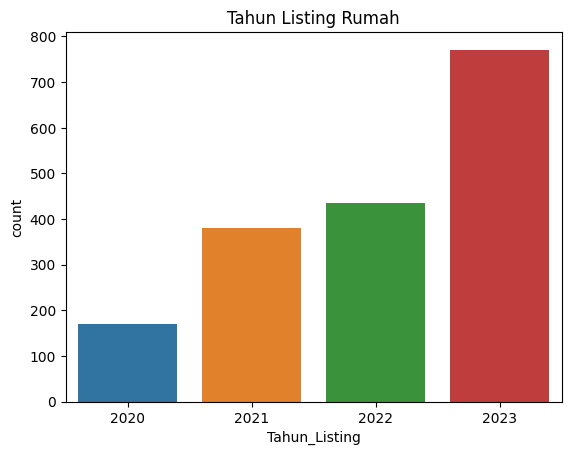

In [ ]:
# Plot distribusi Tahun_Listing
sns.countplot(x='Tahun_Listing', data=rumah)
plt.title("Tahun Listing Rumah")

Kesimpulan:
- Outliers dan Missing Values sudah berhasil diatasi
- Persebaran harga rumah tidak mengikuti distribusi normal
- Kebanyakan rumah memiliki luas tanah diantara 50m<sup>2</sup> sampai 75m<sup>2</sup>
- Kebanyakan rumah memiliki luas bangunan diantara 25m<sup>2</sup> sampai 100m<sup>2</sup>
- Kebanyakan rumah memiliki 2 kamar tidur
- Kebanyakan rumah memiliki 1 kamar mandi
- Kebanyakan rumah memiliki SHM - Sertifikat Hak Milik
- Kebanyakan rumah memiliki kondisi baru
- Kebanyakan rumah memiliki kelengkapan kosongan
- Kebanyakan rumah memiliki 1 lantai
- Kebanyakan rumah menghadap ke utara
- Kebanyakan rumah memiliki daya listrik 1300 VA
- Kebanyakan rumah memiliki parkiran untuk 1 mobil
- Kebanyakan rumah tidak memiliki AC
- Kebanyakan rumah tidak memiliki kitchen set
- Kebanyakan rumah tidak memiliki alat dapur
- Kebanyakan rumah tidak memiliki water heater
- Kebanyakan rumah tidak memiliki air sumur bor
- Kebanyakan rumah tidak memiliki balkon
- Kebanyakan rumah memiliki one gate
- Kebanyakan rumah memiliki pengamanan
- Kebanyakan rumah tidak memiliki air pam
- Kebanyakan rumah memiliki tidak memiliki kolam renang
- Kebanyakan rumah tidak memiliki Kamar Pembantu
- Kebanyakan rumah dilisting di tahun 2023  

---
### Data Pre-processing

In [ ]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 0 to 1760
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_rumah              1756 non-null   object 
 1   alamat                  1756 non-null   object 
 2   harga                   1756 non-null   int64  
 3   deskripsi               1756 non-null   object 
 4   Tayang Sejak            1756 non-null   object 
 5   Luas Tanah              1756 non-null   int64  
 6   Luas Bangunan           1756 non-null   int64  
 7   Kamar Tidur             1756 non-null   int64  
 8   Kamar Mandi             1756 non-null   int64  
 9   Sertifikat              1756 non-null   object 
 10  Kondisi                 1756 non-null   object 
 11  Kelengkapan             1756 non-null   object 
 12  Jumlah Lantai           1756 non-null   object 
 13  Menghadap               1756 non-null   object 
 14  Daya Listrik            1756 non-null   int32

In [ ]:
# Drop kolom yang tidak digunakan
rumah = rumah.drop(columns=['url', 'alamat', 'nama_rumah', 'deskripsi', 'Tayang Sejak'])
rumah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 0 to 1760
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   harga                   1756 non-null   int64  
 1   Luas Tanah              1756 non-null   int64  
 2   Luas Bangunan           1756 non-null   int64  
 3   Kamar Tidur             1756 non-null   int64  
 4   Kamar Mandi             1756 non-null   int64  
 5   Sertifikat              1756 non-null   object 
 6   Kondisi                 1756 non-null   object 
 7   Kelengkapan             1756 non-null   object 
 8   Jumlah Lantai           1756 non-null   object 
 9   Menghadap               1756 non-null   object 
 10  Daya Listrik            1756 non-null   int32  
 11  Parkir                  1756 non-null   object 
 12  AC                      1756 non-null   float64
 13  Kitchen Set             1756 non-null   float64
 14  Alat Dapur              1756 non-null   float

Encoding kolom kategorikal

In [ ]:
rumah_cat = rumah.select_dtypes(include=['object'])
rmh_cat_col = rumah_cat.columns

In [ ]:
for i in rmh_cat_col:
    print(f"Nilai unik dari kolom{i}: {rumah[i].unique()}\n")

Nilai unik dari kolomSertifikat: ['HGB - Hak Guna Bangunan' 'SHM - Sertifikat Hak Milik'
 'Lainnya (PPJB, Girik, Adat, dll.)' 'Hak Pakai' 'HGU - Hak Guna Usaha'
 'Strata Title']

Nilai unik dari kolomKondisi: ['Baru' 'Bekas']

Nilai unik dari kolomKelengkapan: ['Kosongan' 'Full Furnished' 'Semi Furnished']

Nilai unik dari kolomJumlah Lantai: ['1' '2' '3']

Nilai unik dari kolomMenghadap: ['Timur' 'Lainnya' 'Utara' 'Selatan' 'Barat' 'Timur Laut' 'Barat Daya'
 'Barat laut' 'Tenggara']

Nilai unik dari kolomParkir: ['1 mobil ' 'Lainnya ' '2 mobil ' '3 mobil ' '4 mobil ']

Nilai unik dari kolomWilayah: ['Kabupaten Tangerang']

Nilai unik dari kolomKategori Luas Tanah: ['Kecil' 'Sedang' 'Besar']

Nilai unik dari kolomKategori Luas Bangunan: ['Kecil' 'Sedang' 'Besar']



In [ ]:
label_enc = LabelEncoder()

for i in rmh_cat_col:
    rumah[i] = label_enc.fit_transform(rumah[i])

In [ ]:
rumah.head()

,harga,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Sertifikat,Kondisi,Kelengkapan,Jumlah Lantai,Menghadap,...,Balkon,One Gate,Pengamanan,Air PAM,Kolam Renang,K. Pembantu,Wilayah,Kategori Luas Tanah,Kategori Luas Bangunan,Tahun_Listing
0,320400000,30,60,2,1,0,0,1,0,6,...,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1,2023
1,500000000,60,46,2,2,4,0,0,1,6,...,1.0,1.0,1.0,1.0,0.0,0.0,0,1,1,2023
2,500000000,60,46,2,2,4,0,0,1,6,...,1.0,1.0,1.0,1.0,1.0,0.0,0,1,1,2023
3,440000000,60,31,2,1,4,0,1,0,6,...,0.0,1.0,1.0,1.0,1.0,0.0,0,1,1,2023
4,297000000,60,30,2,1,4,0,1,0,6,...,1.0,1.0,1.0,1.0,0.0,1.0,0,1,1,2023


In [ ]:
X = rumah.iloc[:, 1:26]
y = rumah['harga'].values
X

,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Sertifikat,Kondisi,Kelengkapan,Jumlah Lantai,Menghadap,Daya Listrik,...,Air Sumur Bor,Balkon,One Gate,Pengamanan,Air PAM,Kolam Renang,K. Pembantu,Wilayah,Kategori Luas Tanah,Kategori Luas Bangunan
0,30,60,2,1,0,0,1,0,6,1300,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1
1,60,46,2,2,4,0,0,1,6,2200,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,1,1
2,60,46,2,2,4,0,0,1,6,2200,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,1
3,60,31,2,1,4,0,1,0,6,2200,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,1,1
4,60,30,2,1,4,0,1,0,6,1300,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,60,33,2,1,3,0,1,0,4,1300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1757,120,120,2,2,4,1,1,0,3,1300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2
1758,84,30,2,1,0,1,1,0,6,1300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2,1
1759,72,45,2,1,4,1,1,0,8,1300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [ ]:
ss = MinMaxScaler()
X_scaled = ss.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

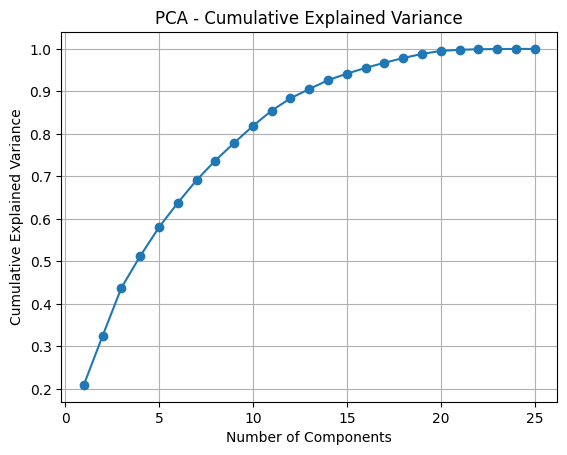

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=20)
X_scaled = pca.fit_transform(X_scaled)

Feature selection menggunakan RF feature importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Shape of Train set: \nX_train {X_train.shape} | y_train {y_train.shape}\n")
print(f"Shape of Test set: \nX_test {X_test.shape} | y_test {y_test.shape}")

Shape of Train set: 
X_train (1404, 20) | y_train (1404,)

Shape of Test set: 
X_test (352, 20) | y_test (352,)


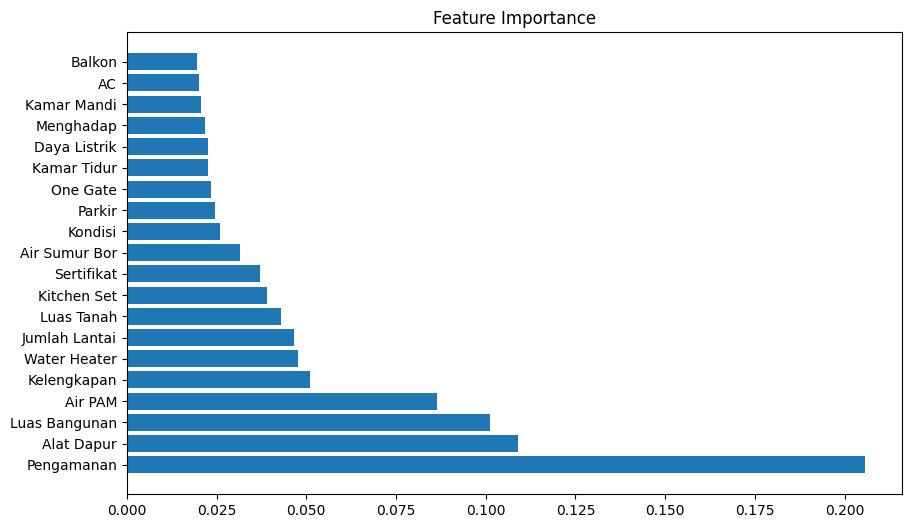

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

fi = rf.feature_importances_

feat_name = X_scaled_df.columns

# Sort features by importance in descending order
sorted_idx = fi.argsort()[::-1]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), fi[sorted_idx])
plt.yticks(range(len(sorted_idx)), feat_name[sorted_idx])
plt.title("Feature Importance")
plt.show()

In [ ]:
X = X_scaled
y = rumah['harga']
X

array([[ 1.16492281, -0.34134403,  0.84536214, ...,  0.118894  ,
         0.01154005, -0.00288098],
       [ 0.95868403,  0.80279535, -0.10858483, ..., -0.33046304,
         0.0147875 , -0.08910592],
       [ 0.99266653,  1.1331386 , -0.27625685, ..., -0.22519754,
        -0.00658149, -0.08847338],
       ...,
       [-0.35476431, -0.1953151 ,  0.02999836, ..., -0.10118568,
         0.16020296, -0.17364683],
       [-0.9371492 ,  0.11864162,  0.04199934, ..., -0.04186062,
        -0.00575936, -0.0110711 ],
       [ 0.95236679,  0.2110093 , -0.38984941, ...,  0.01302302,
        -0.05968685,  0.05248599]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

---
### Modeling
Tanpa tuning hyperparameter
Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_red = lr.predict(X_test)

In [ ]:
# Akurasi:
lr_r2 = r2_score(y_test, lr_red)
lr_mse = mean_squared_error(y_test, lr_red)
lr_mae = mean_absolute_error(y_test, lr_red)

bbb = ['R2', 'MSE', "MAE"]
acc = [lr_r2, lr_mse, lr_mae]

for i, j in zip(bbb,acc):
    if i == "R2":
        print(f"Akurasi {i}: {np.round(j,2)*100}%")
    else:
        print(f"Akurasi {i}: {np.round(j,2)*100}")

Akurasi R2: 51.0%
Akurasi MSE: 3.5065191129576694e+18
Akurasi MAE: 14500010076.0


Tanpa tuning hyperparameter
Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# Akurasi:
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

bbb = ['R2', 'MSE', "MAE"]
acc = [rf_r2, rf_mse, rf_mae]

for i, j in zip(bbb,acc):
    if i == "R2":
        print(f"Akurasi {i}: {np.round(j,2)*100}%")
    else:
        print(f"Akurasi {i}: {np.round(j,2)*100}")

Akurasi R2: 50.0%
Akurasi MSE: 3.620513142393074e+18
Akurasi MAE: 14344798391.999998


Tanpa tuning hyperparameter
XGBoost

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [ ]:
# Akurasi:
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

bbb = ['R2', 'MSE', "MAE"]
acc = [xgb_r2, xgb_mse, xgb_mae]

for i, j in zip(bbb,acc):
    if i == "R2":
        print(f"Akurasi {i}: {np.round(j,2)*100}%")
    else:
        print(f"Akurasi {i}: {np.round(j,2)*100}")

Akurasi R2: 47.0%
Akurasi MSE: 3.8451095438092503e+18
Akurasi MAE: 14401380444.0


Dengan tuning hyperparameter
Linear regression

In [ ]:
# Hyperparameter tuning linear regression dengan regulatization
# Mendefinisikan model
models = {'Lasso': Lasso(), 'Ridge': Ridge()}

# Mencari alpha/lambda terbaik
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
best_alphas = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_alphas[name] = grid_search.best_params_['alpha']
    print(f'Best {name} alpha: {best_alphas[name]}')

Best Lasso alpha: 10
Best Ridge alpha: 1


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

lasso_lr = Lasso(alpha=10)
lasso_lr.fit(X_train, y_train)
lasso_pred = lasso_lr.predict(X_test)

In [ ]:
# Akurasi:
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

bbb = ['R2', 'MSE', "MAE"]
acc = [lasso_r2, lasso_mse, lasso_mae]

for i, j in zip(bbb,acc):
    if i == "R2":
        print(f"Akurasi {i}: {np.round(j,2)*100}%")
    else:
        print(f"Akurasi {i}: {np.round(j,2)*100}")

Akurasi R2: 51.0%
Akurasi MSE: 3.50651944001569e+18
Akurasi MAE: 14500011049.0


In [ ]:
ridge_lr = Ridge(alpha=10)
ridge_lr.fit(X_train, y_train)
ridge_pred = ridge_lr.predict(X_test)

In [ ]:
# Akurasi:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

bbb = ['R2', 'MSE', "MAE"]
acc = [ridge_r2, ridge_mse, ridge_mae]

for i, j in zip(bbb,acc):
    if i == "R2":
        print(f"Akurasi {i}: {np.round(j,2)*100}%")
    else:
        print(f"Akurasi {i}: {np.round(j,2)*100}")

Akurasi R2: 50.0%
Akurasi MSE: 3.61480222646104e+18
Akurasi MAE: 14808180878.0


In [ ]:
# Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_feat = ['auto', 'sqrt']
max_depth = [2,3,5,10,20,30,40,50,60,70,80,90,100,110]
max_depth.append(None)
min_samples_split=[2,5,10]
min_sample_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_feat,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_sample_leaf,
               'bootstrap':bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
reg = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = reg,
                               param_distributions=random_grid,
                               n_iter=10, cv=5, verbose=2,
                               random_state=42, n_jobs=None)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [ ]:
reg = RandomForestRegressor(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
                            max_features='sqrt', max_depth=None, bootstrap=False)

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [ ]:
# Akurasi:
reg_r2 = r2_score(y_test, pred)
reg_mse = mean_squared_error(y_test, pred)
reg_mae = mean_absolute_error(y_test, pred)

bbb = ['R2', 'MSE', "MAE"]
acc = [reg_r2, reg_mse, reg_mae]

for i, j in zip(bbb,acc):
    if i == "R2":
        print(f"Akurasi {i}: {np.round(j,2)*100}%")
    else:
        print(f"Akurasi {i}: {np.round(j,2)*100}")

Akurasi R2: 52.0%
Akurasi MSE: 3.5569980146445107e+18
Akurasi MAE: 13950507166.999998
